In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error


In [ ]:
!pip install pmdarima
import pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00


In [ ]:
import itertools
import warnings

In [ ]:
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/all_stocks_5yr.csv')  # Adjust the path if needed

In [ ]:
plt.style.use('dark_background')

In [ ]:
print(df.dtypes)

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


In [ ]:
# Select a specific stock (adjust the code according to your data)
stock = 'AAPL'  # Example stock symbol
df_stock = df[df['Name'] == stock]

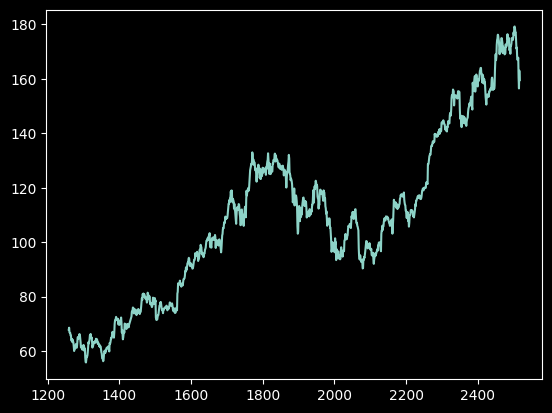

In [ ]:
plt.plot(df_stock['close'])

In [ ]:
df_stock['date'] = pd.to_datetime(df_stock['date'])
print(df_stock.dtypes)

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object


<ipython-input-10-a6ef2dc65040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['date'] = pd.to_datetime(df_stock['date'])


In [ ]:
df_stock.to_csv('C:\\Users\\rohan\\OneDrive\\Documents\\AAPL.csv',index=False)

In [ ]:
df1 = df_stock[['date', 'close']]
print(df1.dtypes)

date     datetime64[ns]
close           float64
dtype: object


In [ ]:
df1.set_index('date', inplace=True)

In [ ]:
print(df1.dtypes)

close    float64
dtype: object


In [ ]:
print(df1.tail())

             close
date              
2018-02-01  167.78
2018-02-02  160.50
2018-02-05  156.49
2018-02-06  163.03
2018-02-07  159.54


In [ ]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df1)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#If data is not stationary, we may need SARIMA and not just ARIMA

pvalue =  0.8555858445838954  if above 0.05, data is not stationary


In [ ]:
#Extract and plot trend, seasonal and residuals.
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df1['close'], model='additive', period=365)


trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

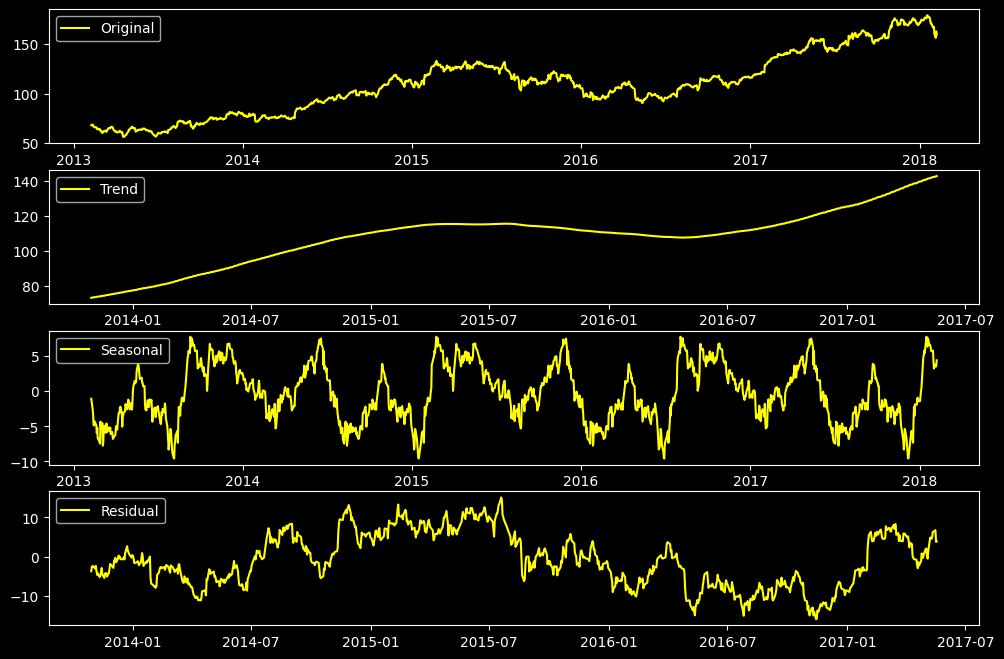

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df1, label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(df1['close'], start_p = 1, d=1, start_q = 1,
                          max_p = 5, max_q = 5, max_d=5, m = 365,
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True, n_fits=50)

# To print the summary
print(arima_model.summary() ) #Note down the Model and details.


Performing stepwise search to minimize aic


In [ ]:
# To print the summary
print(best_model.summary() ) #Note down the Model and details.

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(2, 1, 4)   Log Likelihood                 -72.028
Date:                Thu, 30 Nov 2023   AIC                            158.057
Time:                        09:19:14   BIC                            194.018
Sample:                             0   HQIC                           171.571
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0000   3.84e-10   5.21e+09      0.000       2.000       2.000
ar.L2         -1.0000   6.62e-11  -1.51e+10      0.000      -1.000      -1.000
ma.L1         -1.9993   7.13e-08   -2.8e+07      0.0

In [ ]:
# Best Model : ARIMA(2,1,4)

In [ ]:
#Split data into train and test
size = int(len(df1) * 0.66)
X_train, X_test = df1[0:size], df1[size:len(df)]

In [ ]:
# Fit a ARIMA(2,1,4) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Fit the ARIMA(2, 1, 4) model
model = ARIMA(X_train['close'], order=(2, 1, 4))
results = model.fit()

# Output the summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  830
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -1525.634
Date:                Thu, 30 Nov 2023   AIC                           3065.269
Time:                        09:24:11   BIC                           3098.310
Sample:                             0   HQIC                          3077.941
                                - 830                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2851      1.257     -0.227      0.821      -2.750       2.179
ar.L2          0.4332      1.209      0.358      0.720      -1.936       2.802
ma.L1          0.2972      1.260      0.236      0.8

In [ ]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = results.predict(start_index, end_index)

In [ ]:
#Prediction
start_index = len(X_train)
end_index = len(df1)-1
prediction = results.predict(start_index, end_index).rename('Predicted close value')
#Rename the column

<Axes: xlabel='date'>

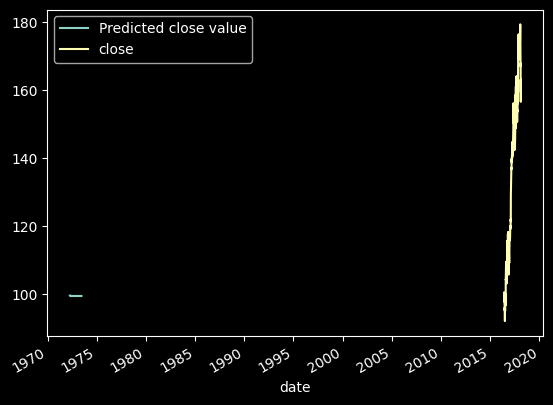

In [ ]:
# plot predictions and actual values
prediction.plot(legend = True)
X_test['close'].plot(legend = True)

In [ ]:
# Select a specific stock (adjust the code according to your data)
stock = 'AAPL'  # Example stock symbol
df_stock = df[df['Name'] == stock]

In [ ]:
print(df_stock.head())

               open     high      low    close     volume  Name
date                                                           
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL


In [ ]:
# Determine the split ratio
split_ratio = 0.8  # For example, 80% of the data for training

# Calculate the split index
split_index = int(len(df_stock) * split_ratio)

# Split the data
train_data = df_stock.iloc[:split_index]['close']  # Training set (first 80% of the data)
test_data = df_stock.iloc[split_index:]['close']   # Testing set (remaining 20% of the data)

In [ ]:
# Fit the ARIMA model on the training set
p = 30 # Example parameter, adjust based on your analysis
d = 3  # Example parameter, adjust based on your analysis
q = 1 # Example parameter, adjust based on your analysis
model = ARIMA(X_train, order=(p, d, q))
model_fit = model.fit()

In [ ]:
forecast = model_fit.forecast(steps=len(X_test))

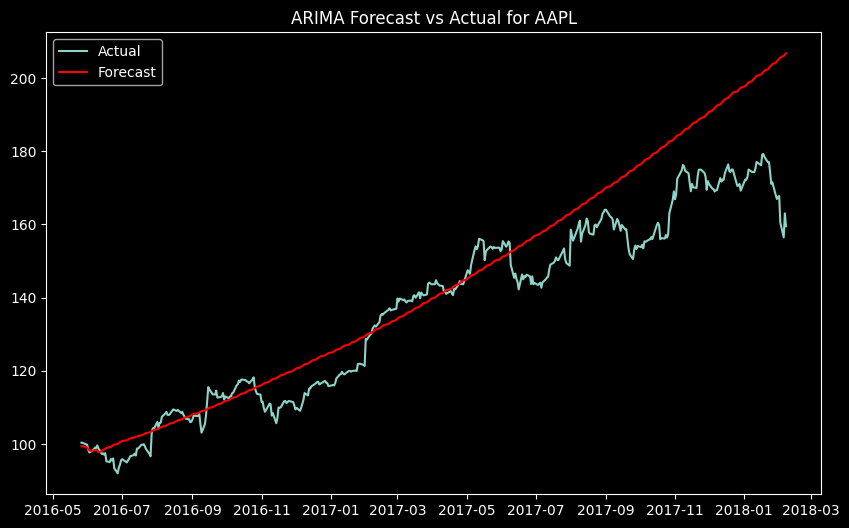

In [ ]:
# Compare predictions with the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, X_test, label='Actual')
plt.plot(X_test.index, forecast, label='Forecast', color='red')
plt.title(f'ARIMA Forecast vs Actual for {stock}')
plt.legend()
plt.show()

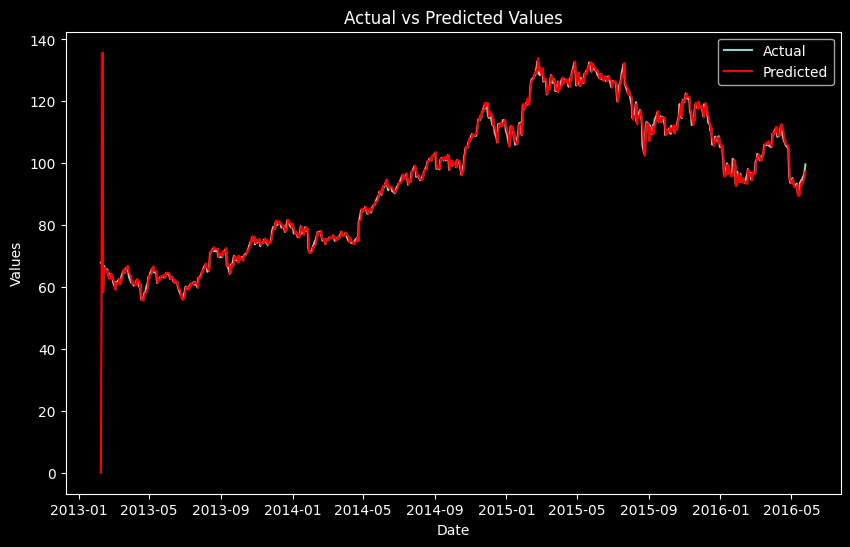

In [ ]:
# Generate predictions
predictions = model_fit.predict(start=X_train.index[0], end=X_train.index[-1])

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_train, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
print('R-squared :', metrics.r2_score(X_test, forecast))

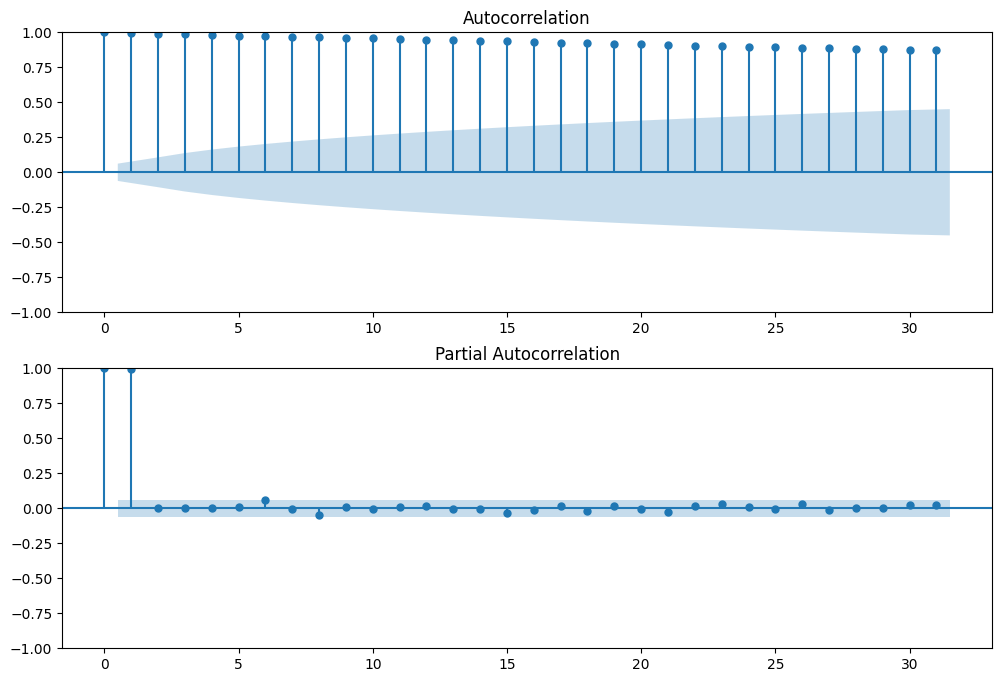

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF of the training data
plot_acf(train_data, ax=ax1)

# Plot the PACF of the training data
plot_pacf(train_data, ax=ax2)

plt.show()